In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import scipy.stats as stats #for hypothesis testing
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv('data.csv')
data.head()

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
data.describe()

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


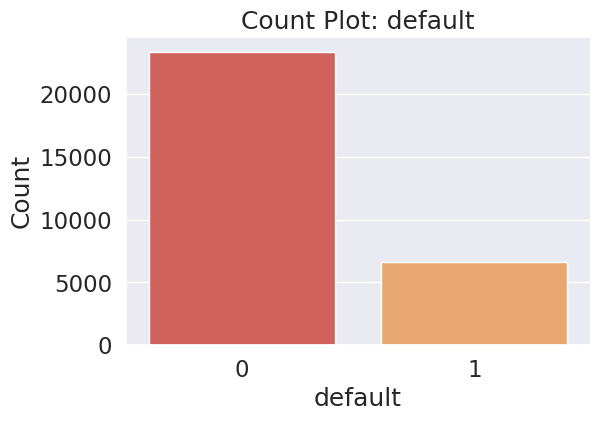

In [33]:
# count plot
variable = 'default'

# Create the count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x=variable)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title(f"Count Plot: {variable}")
plt.show()

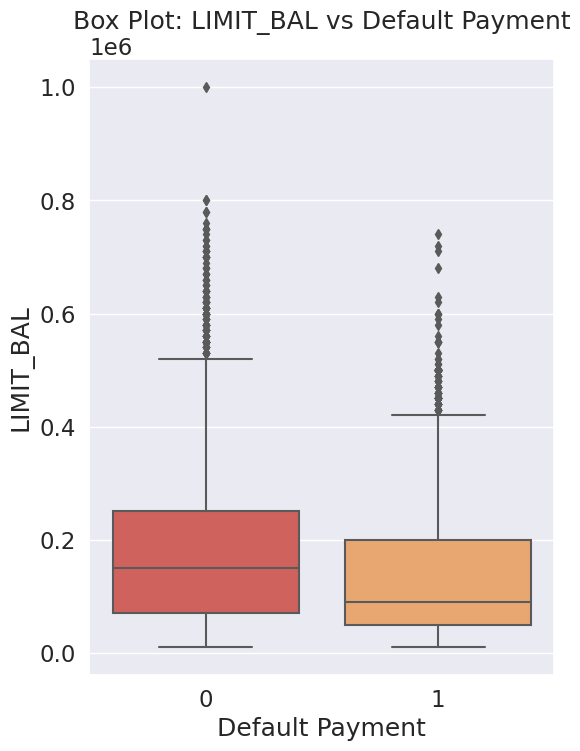

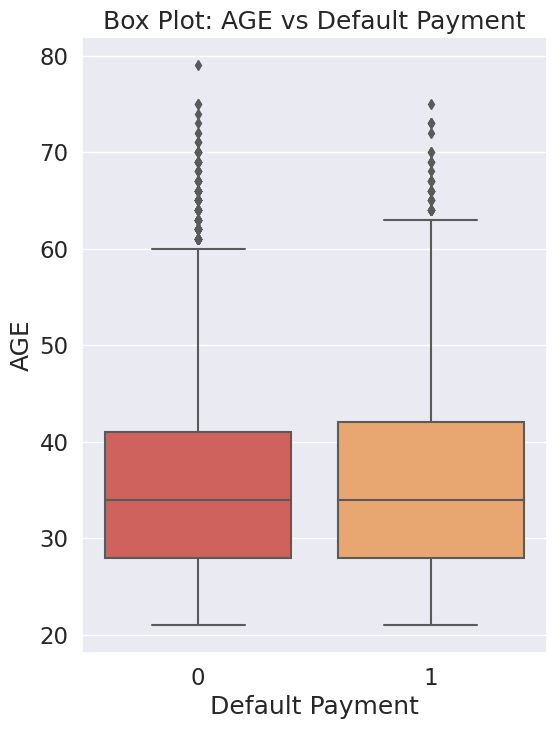

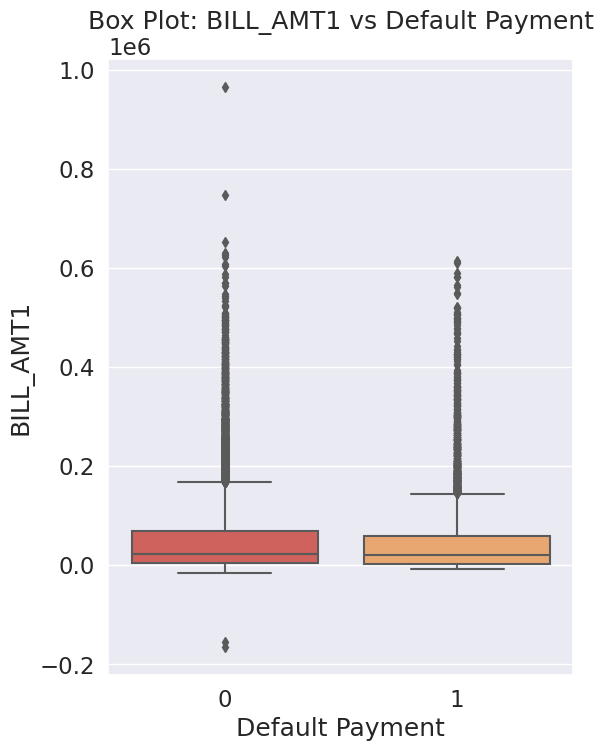

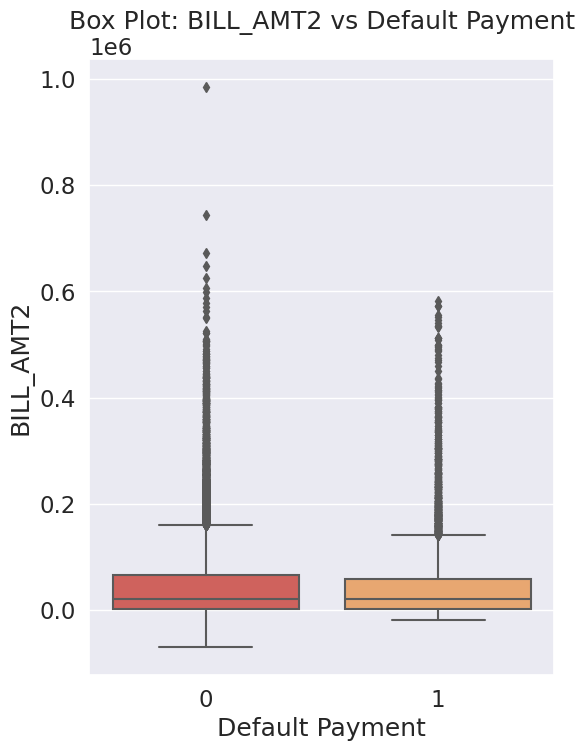

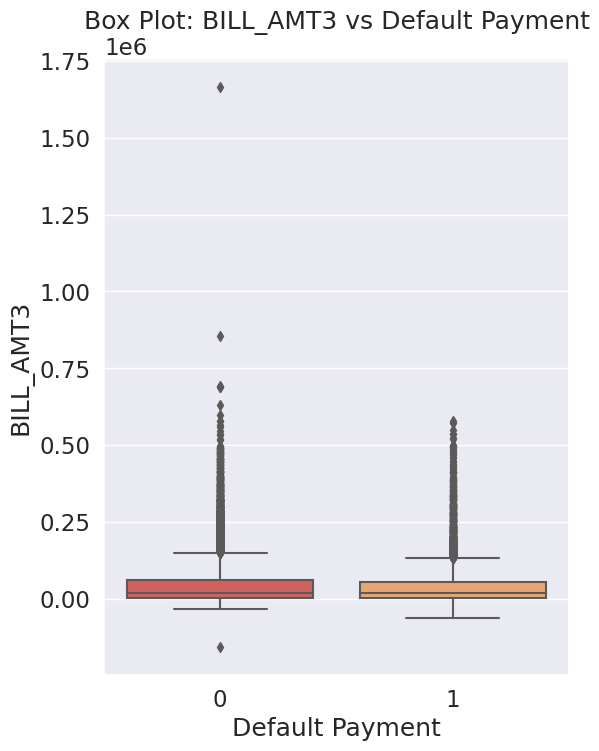

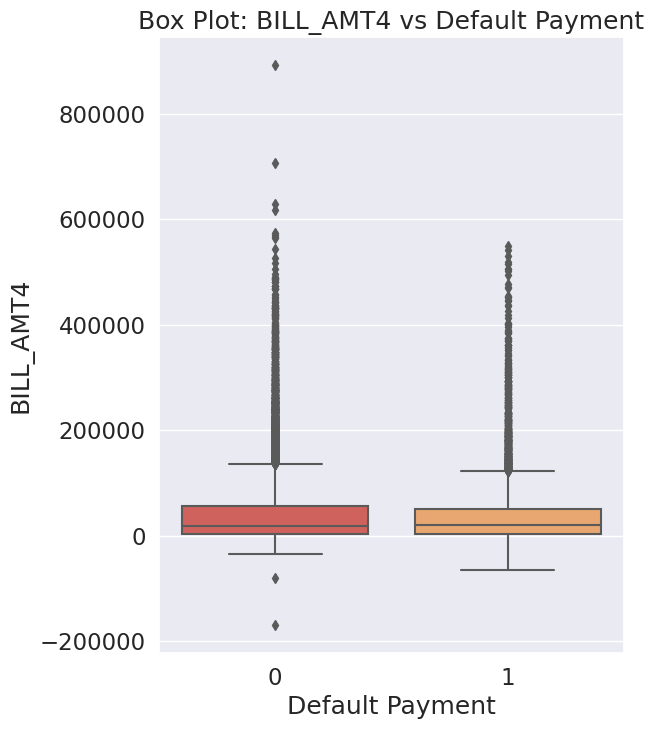

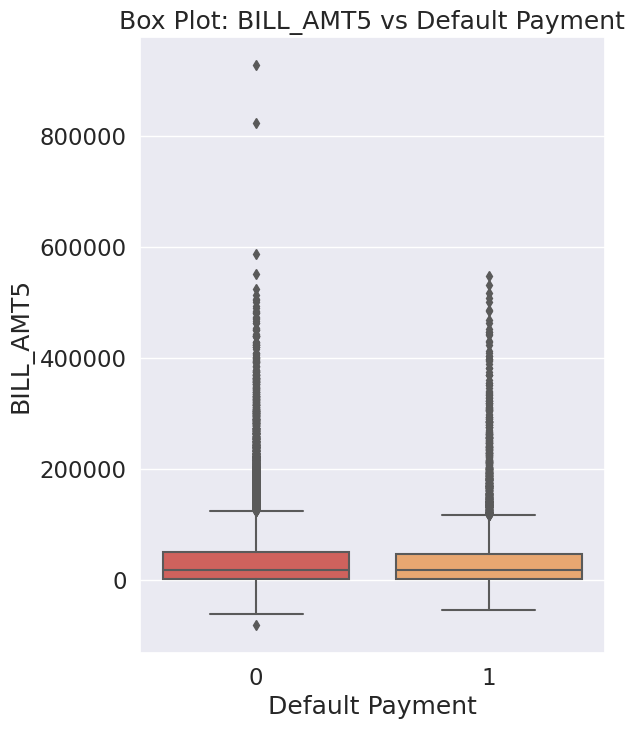

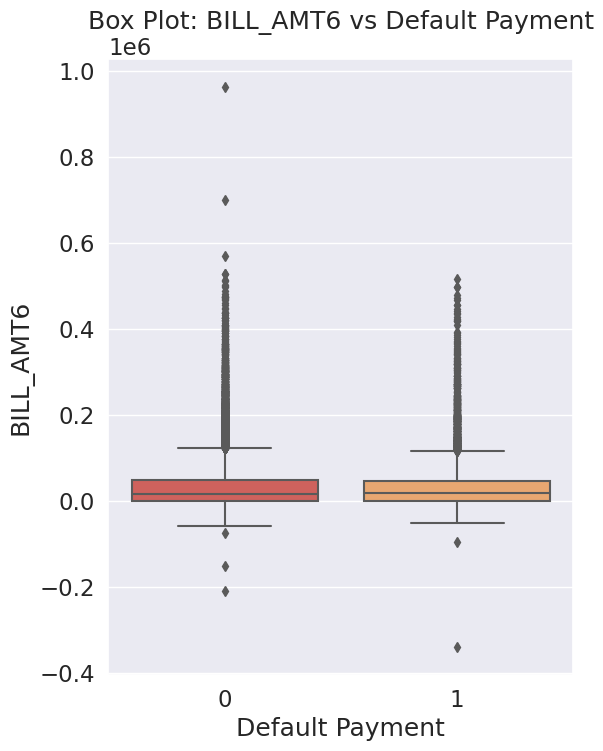

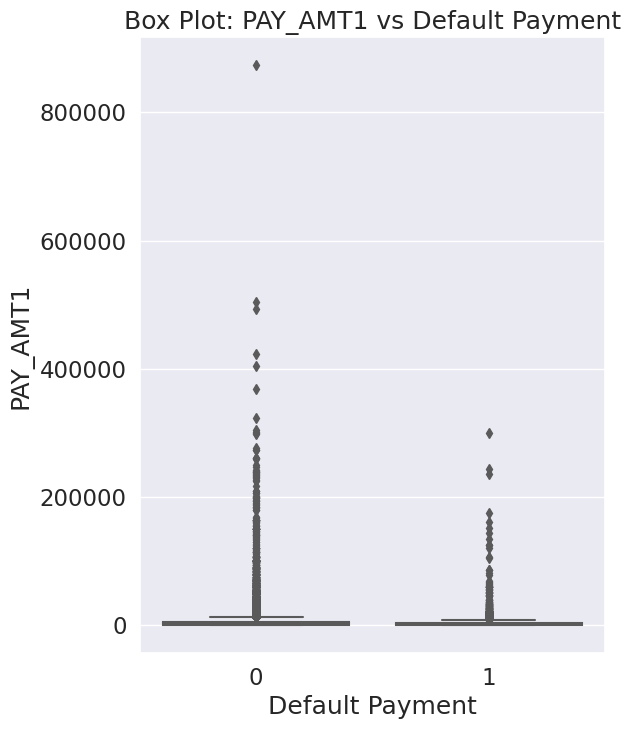

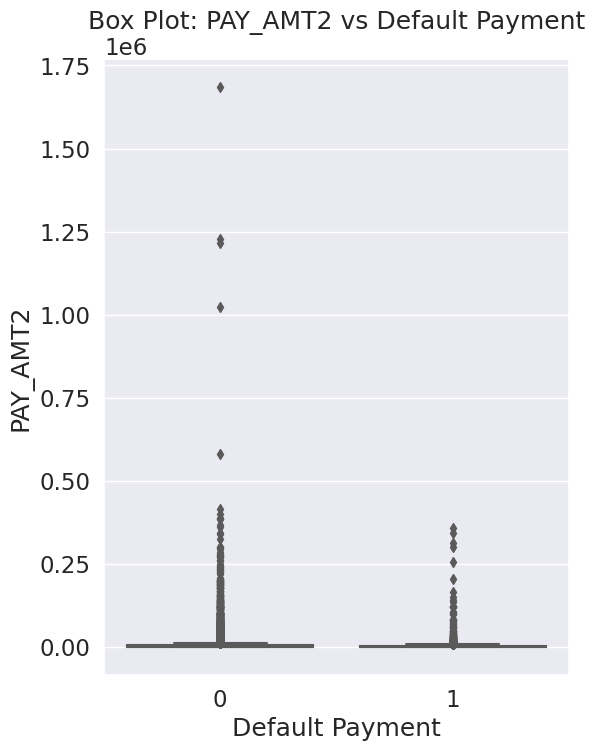

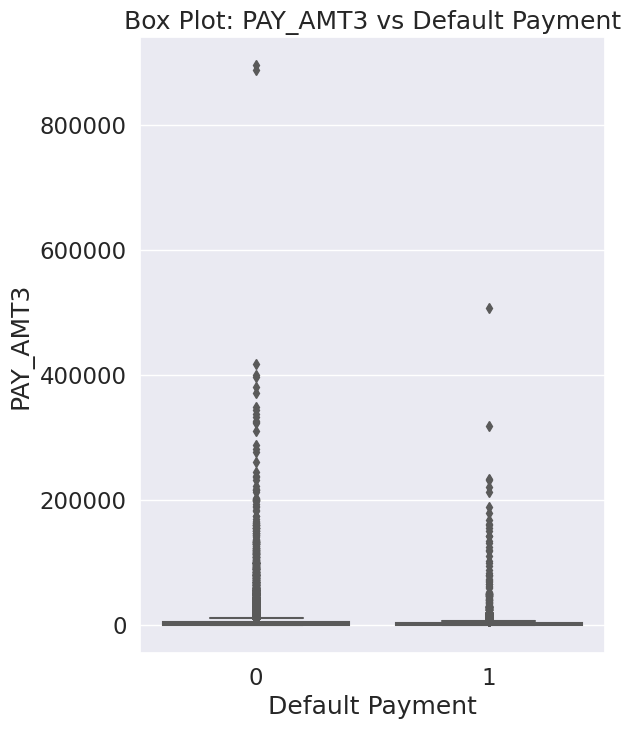

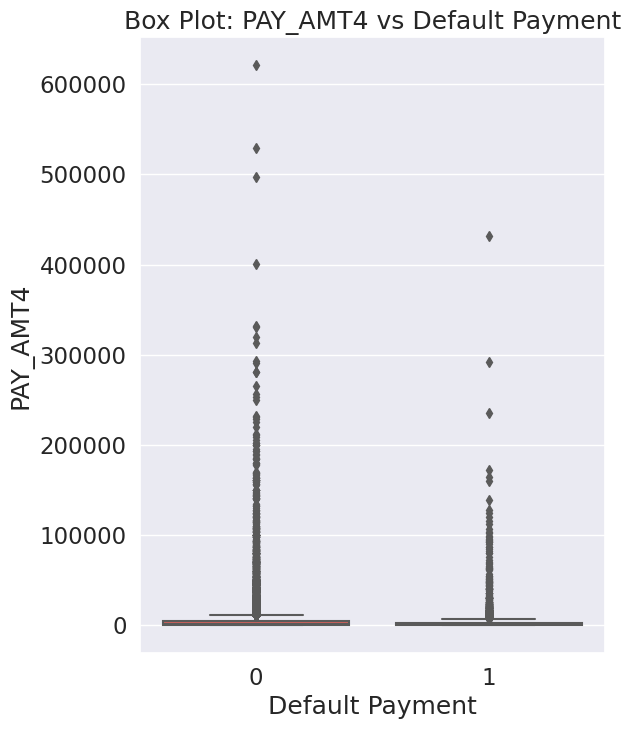

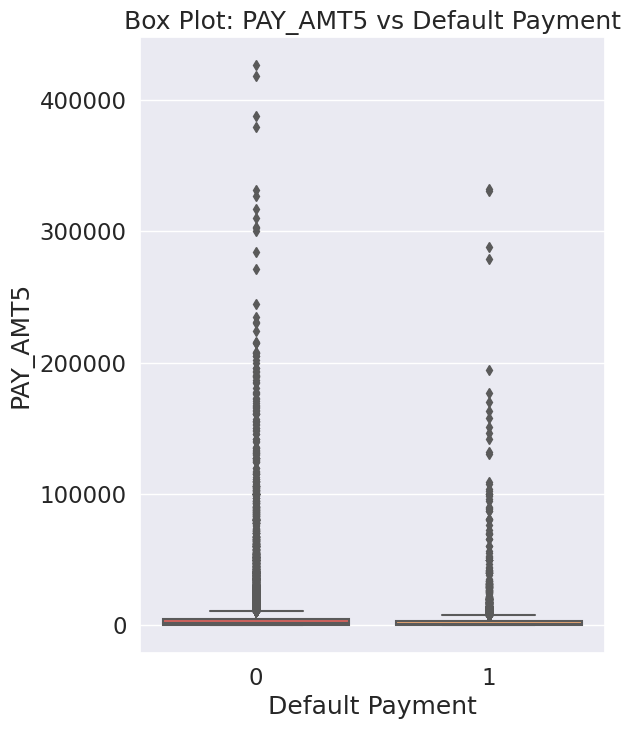

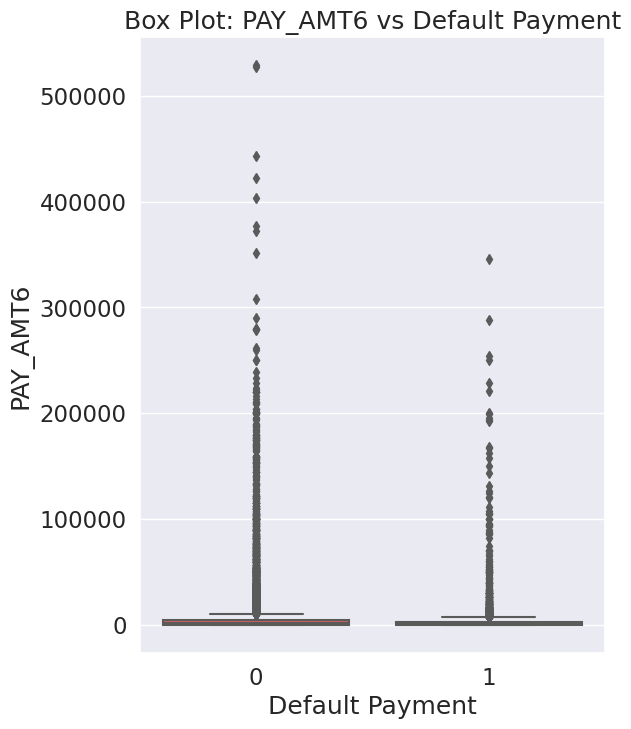

In [34]:
# box plot between default and each numerical predictor variable
# Select predictor variables
predictor_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Create box plots for each predictor variable
for var in predictor_vars:
    plt.figure(figsize=(6, 8))
    sns.boxplot(x='default', y=var, data=data)
    plt.xlabel('Default Payment')
    plt.ylabel(var)
    plt.title(f"Box Plot: {var} vs Default Payment")
    plt.show()

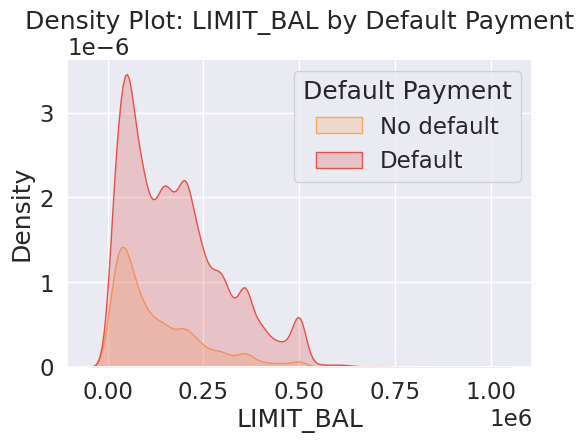

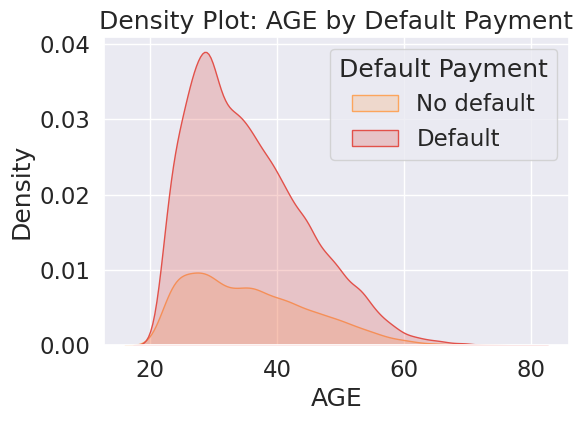

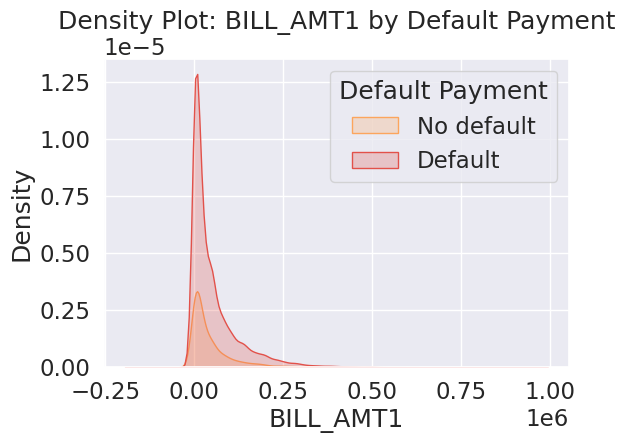

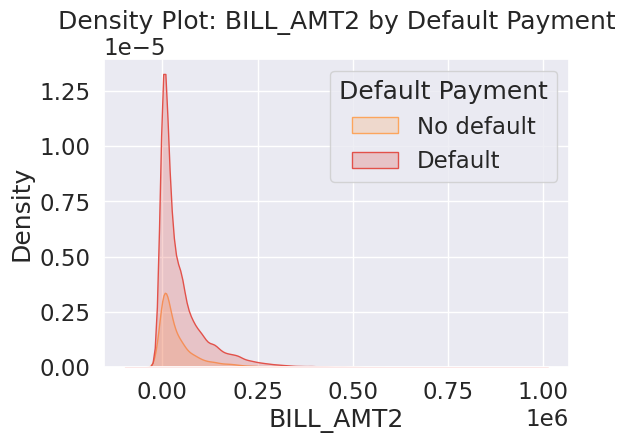

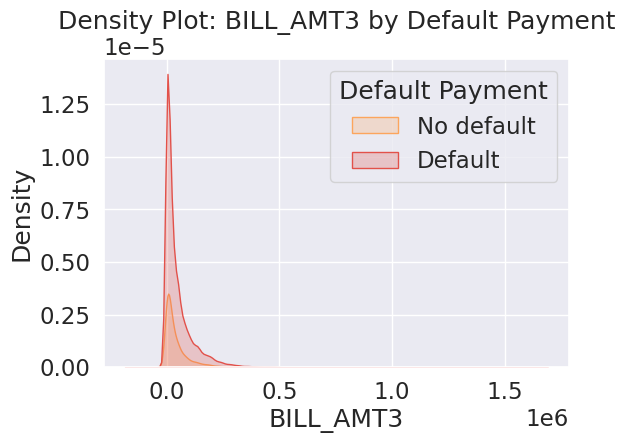

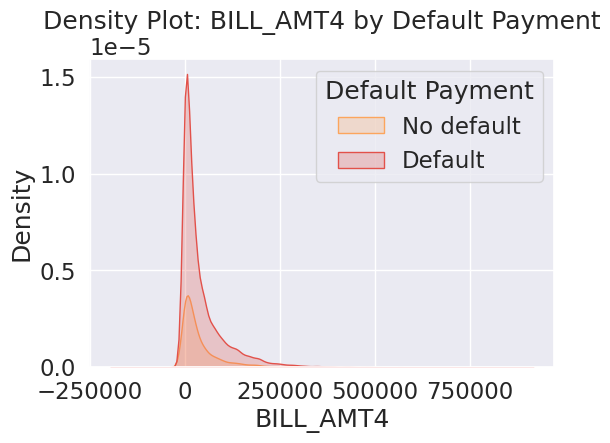

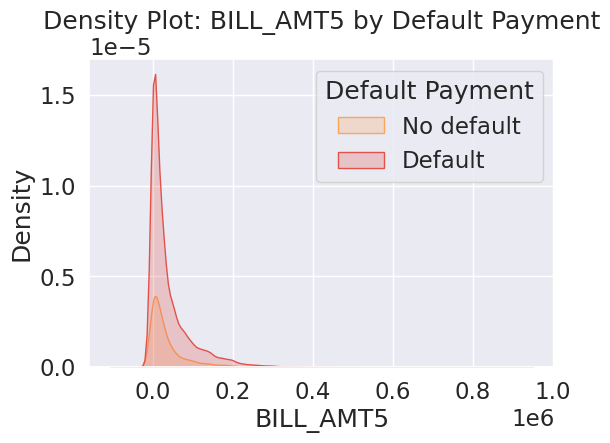

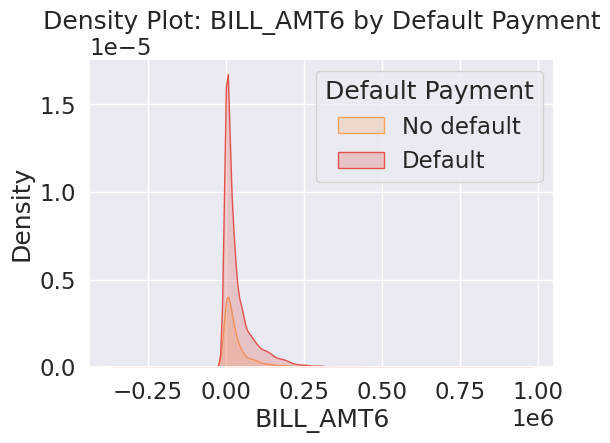

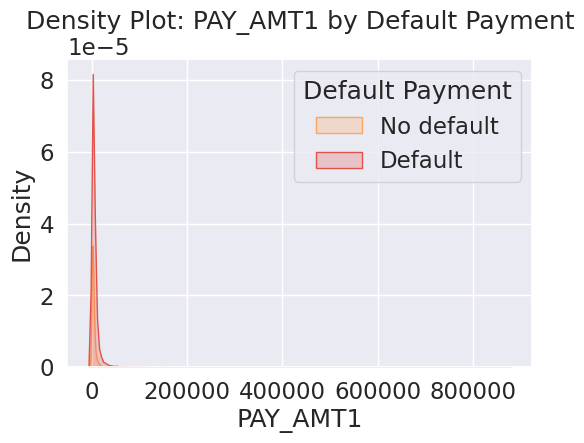

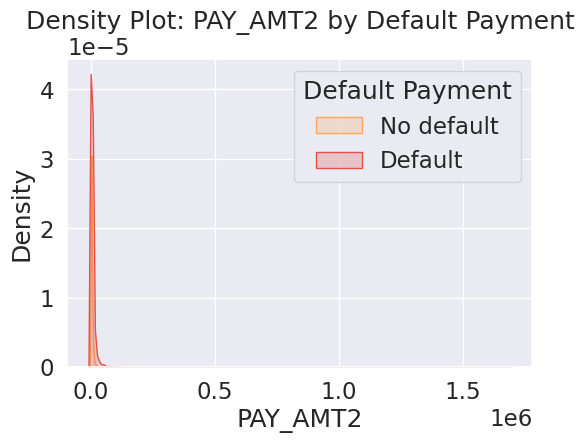

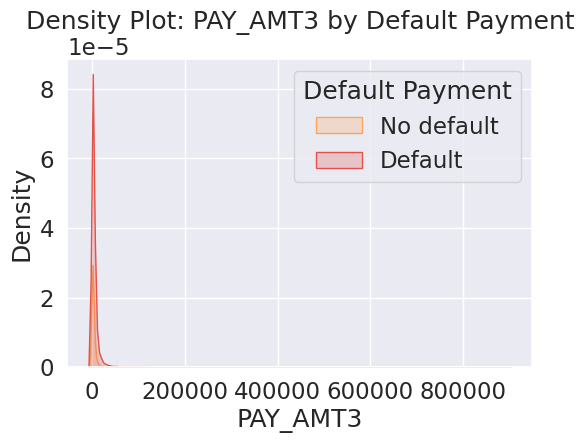

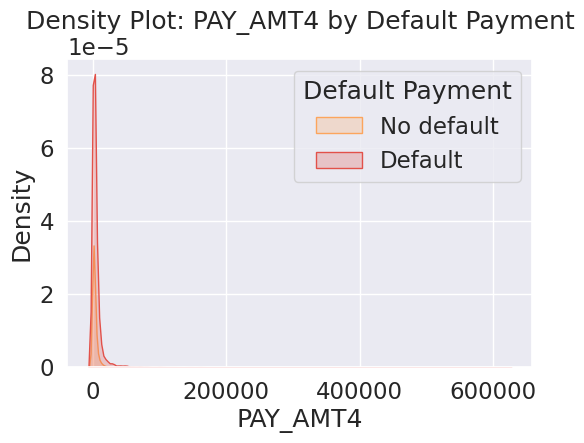

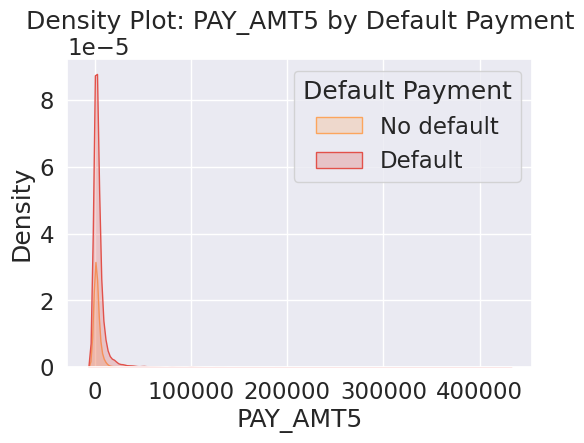

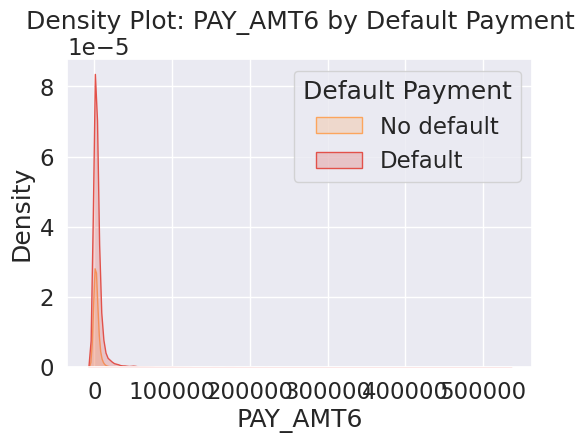

In [35]:
# Create density plots for each predictor variable
for var in predictor_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.kdeplot(data=data, x=var, hue='default', hue_order=[0,1], fill=True)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(f"Density Plot: {var} by Default Payment")
    plt.legend(title='Default Payment', labels=['No default', 'Default'], loc='upper right')
    plt.show()

In [36]:
#t-test
#In the given code, t-tests are performed to compare the means of different numerical variables between two groups:
#default payment status 0 (non-default) and 1 (default). The hypothesis can be stated as follows:
#Null Hypothesis (H0): There is no significant difference in the means of the numerical variable between the default
#payment status groups.
#Alternative Hypothesis (H1): There is a significant difference in the means of the numerical variable between the
#default payment status groups.
# Segregate data based on default payment status
default_0_data = data[data['default'] == 0]
default_1_data = data[data['default'] == 1]

# Select numerical variables
numerical_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
ttest_results = pd.DataFrame(columns=['feature', 't_value', 'p_value'])

# Perform t-tests for difference of means
for var in numerical_vars:
    group_0_values = default_0_data[var]
    group_1_values = default_1_data[var]

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group_0_values, group_1_values)


    ttest_results = ttest_results.append({'feature': var, 't_value': t_statistic, 'p_value': p_value}, ignore_index=True)

    ttest_results = ttest_results.sort_values('p_value')
print(ttest_results)

      feature    t_value        p_value
0   LIMIT_BAL  26.908522  1.302244e-157
1    PAY_AMT1  12.665063   1.146488e-36
2    PAY_AMT2  10.163244   3.166657e-24
3    PAY_AMT4   9.858397   6.830942e-23
4    PAY_AMT3   9.757972   1.841770e-22
5    PAY_AMT5   9.561893   1.241345e-21
13   PAY_AMT6   9.224372   3.033589e-20
6   BILL_AMT1   3.403018   6.673295e-04
7   BILL_AMT2   2.458503   1.395736e-02
8   BILL_AMT3   2.438112   1.476998e-02
9         AGE  -2.405942   1.613685e-02
10  BILL_AMT4   1.759189   7.855564e-02
11  BILL_AMT5   1.170934   2.416344e-01
12  BILL_AMT6   0.930495   3.521225e-01


<Axes: >

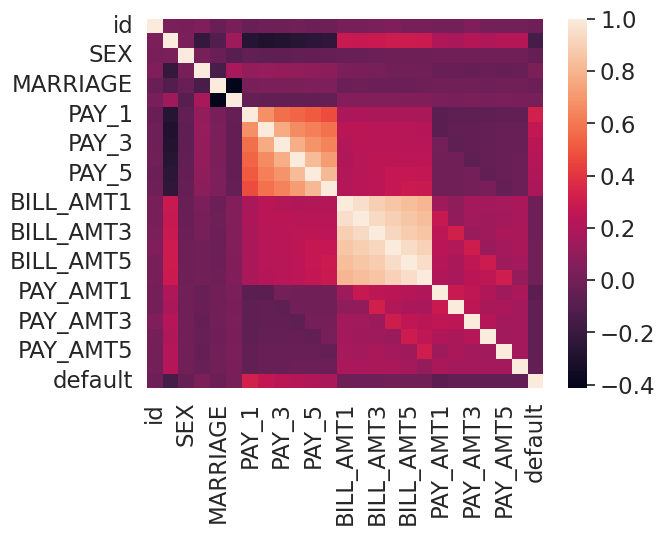

In [37]:
correlation = data. corr()
sns. heatmap (correlation)

There is high positive correlation between bill_amount (1-6) variables.
Also there is high positive correlation between pay_ (1-6) variables.
So there is potential multicollinearity between these variables.

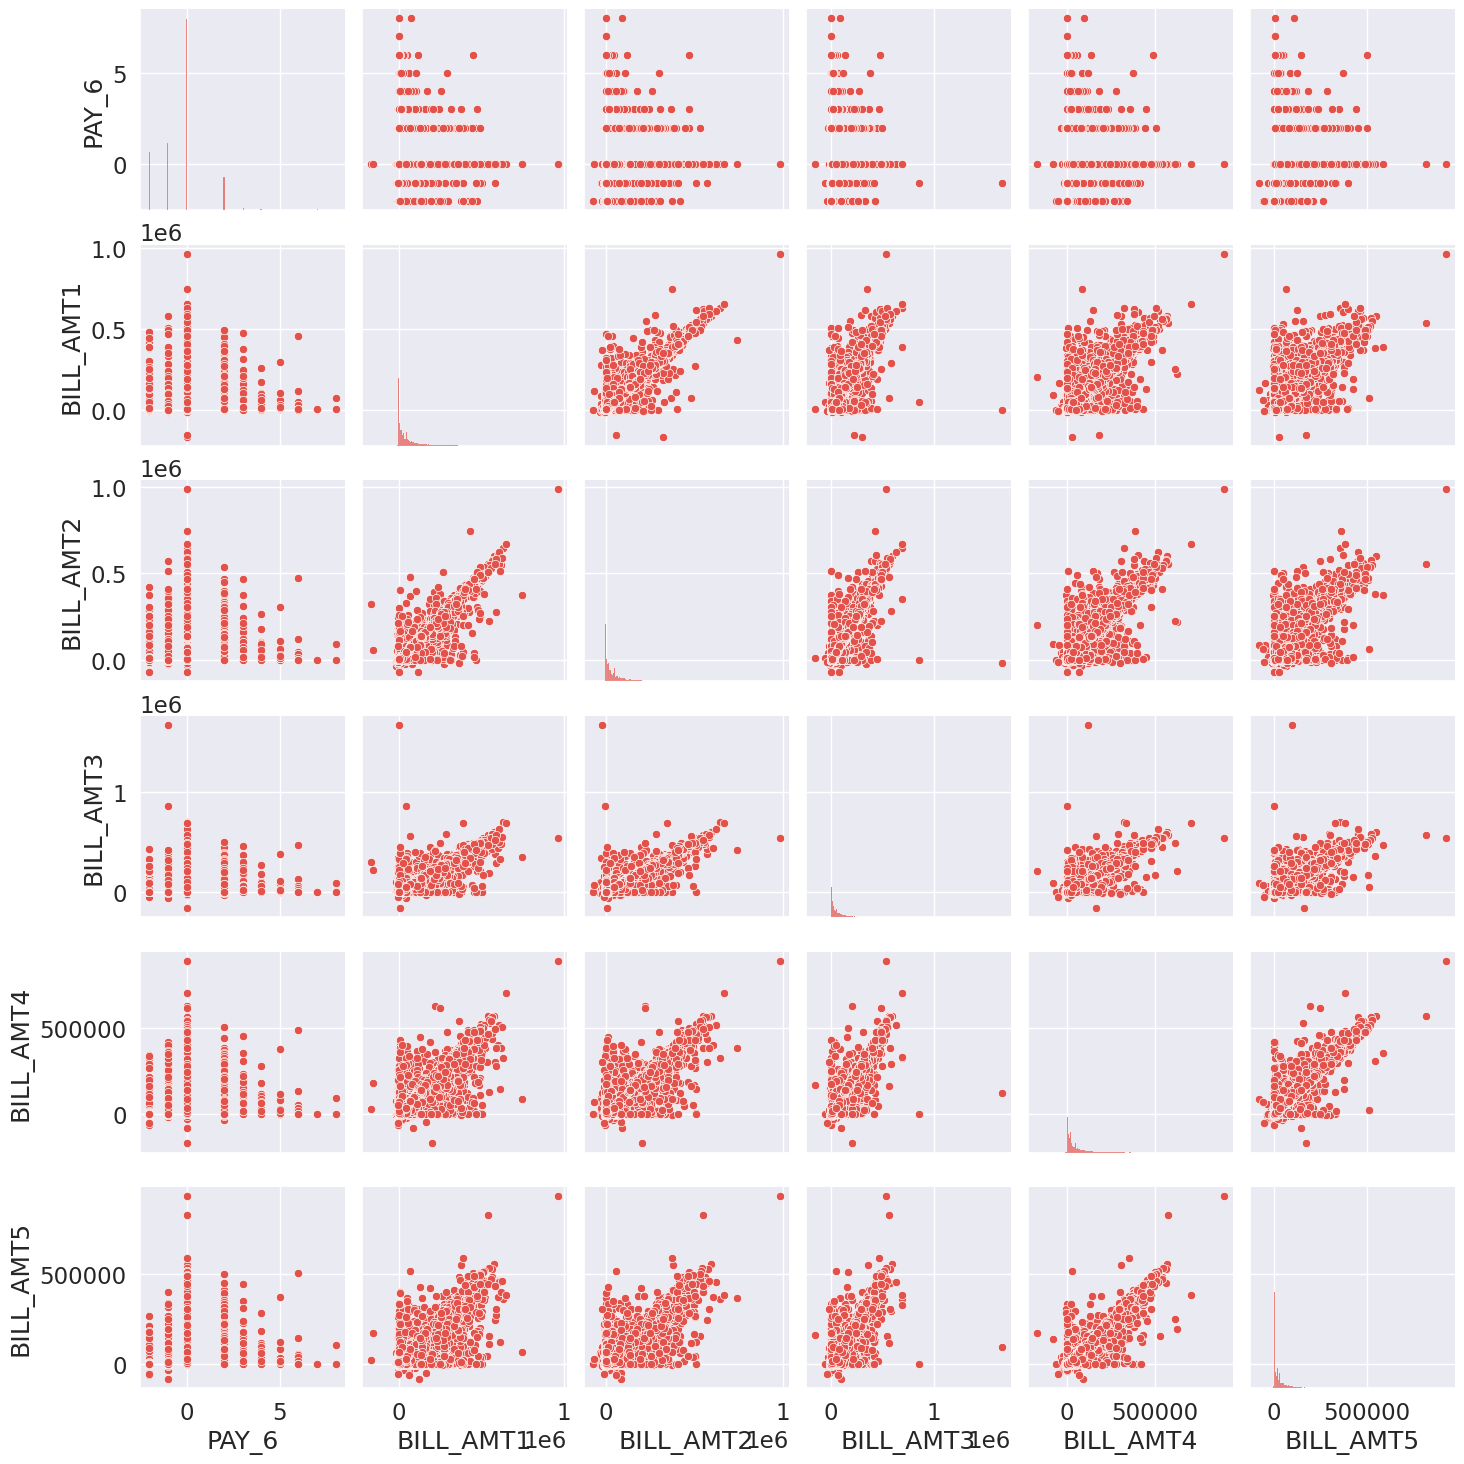

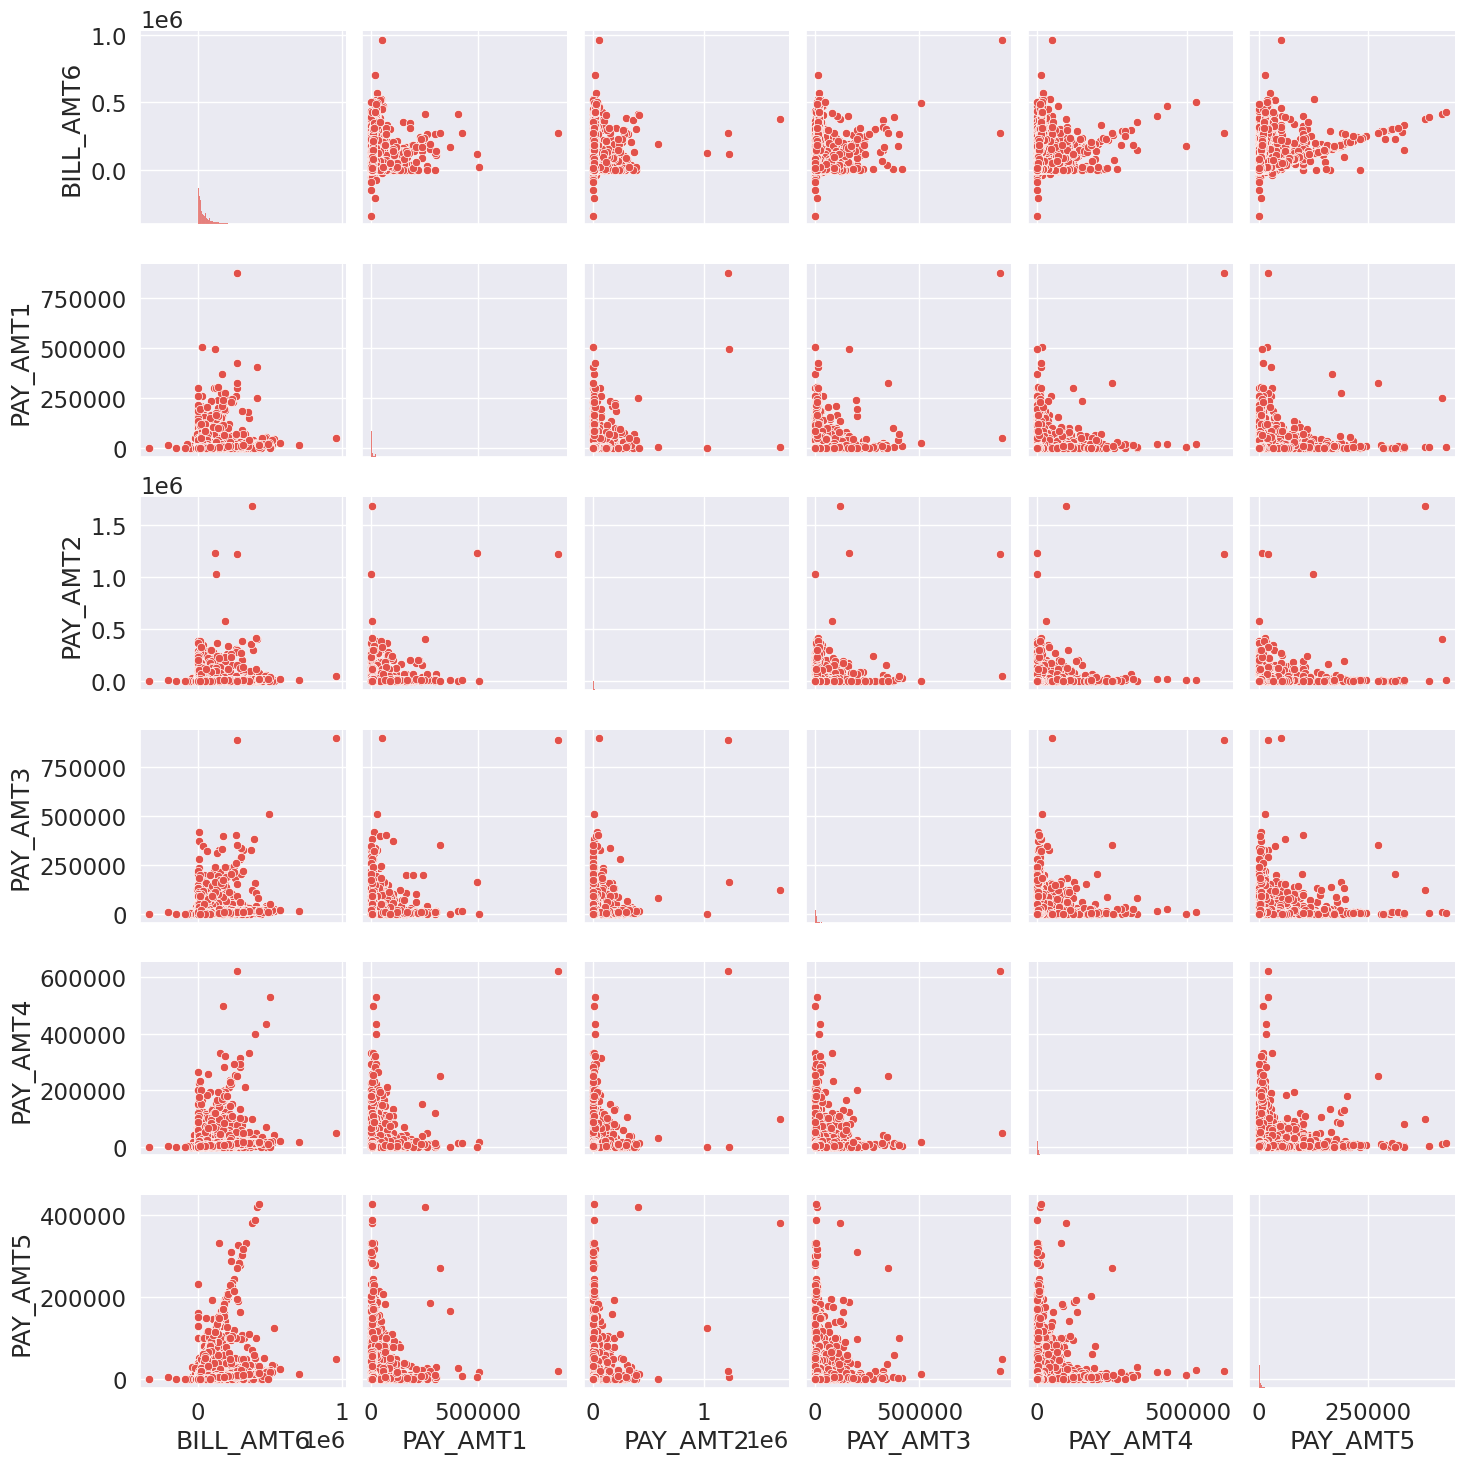

In [38]:
sns.pairplot(data, vars=data.columns[11:17], kind='scatter')
sns.pairplot(data, vars=data.columns[17:23])

# Dropping id column

In [39]:
data=data.drop(['id'],axis=1)

# Oversampling for imbalanced data

In [40]:
# train test split
X = data.iloc[:, 0:23]
y = data['default']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Index or column names of the numerical features
num_features = ['LIMIT_BAL', 'SEX', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Index or column names of the categorical features
cat_features = [ 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Create transformers for numerical and categorical features
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a SMOTE object
smote = SMOTE()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_features', num_transformer, num_features),
        ('cat_features', cat_transformer, cat_features)
    ])

# Fit and transform the numerical and categorical features of the training data
X_train_processed1 = preprocessor.fit_transform(X_train)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed1, y_train)

# Transform the numerical and categorical features of the test data
X_test_processed1 = preprocessor.transform(X_test)

In [42]:
#Training balanced data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logistic_model = LogisticRegression()
logistic_model.fit(X_train_processed1, y_train)
# Make predictions on the test data
y_pred_oversample = logistic_model.predict(X_test_processed1)
#Printing classification report
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred_oversample))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4663
           1       0.65      0.24      0.36      1337

    accuracy                           0.80      6000
   macro avg       0.73      0.60      0.62      6000
weighted avg       0.78      0.80      0.77      6000



In [43]:
# Extract the coefficients and intercept
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

equation = 'y = '
for i, coef in enumerate(coefficients):
    equation += f'({coef:.4f} * x{i}) + '
equation += f'{intercept:.4f}'

print(equation)


y = (-0.2521 * x0) + (-0.0590 * x1) + (-0.1435 * x2) + (0.2667 * x3) + (0.0501 * x4) + (0.0623 * x5) + (0.0119 * x6) + (-0.0367 * x7) + (-0.2417 * x8) + (-0.1908 * x9) + (-0.0488 * x10) + (-0.0556 * x11) + (-0.0589 * x12) + (-0.0400 * x13) + (-0.4044 * x14) + (-0.3986 * x15) + (-0.8463 * x16) + (-0.1252 * x17) + (0.4806 * x18) + (0.5361 * x19) + (-0.2618 * x20) + (0.1211 * x21) + (0.4757 * x22) + (0.3065 * x23) + (-0.0954 * x24) + (-0.1615 * x25) + (-0.0440 * x26) + (0.1166 * x27) + (0.1932 * x28) + (-0.0344 * x29) + (-0.1164 * x30) + (-0.7371 * x31) + (0.2944 * x32) + (0.3166 * x33) + (0.1518 * x34) + (-0.1552 * x35) + (-0.1865 * x36) + (-0.1378 * x37) + (0.2569 * x38) + (0.3323 * x39) + (-0.0452 * x40) + (0.6267 * x41) + (-0.6415 * x42) + (-0.2420 * x43) + (0.2738 * x44) + (-0.1979 * x45) + (-0.1137 * x46) + (-0.2976 * x47) + (-0.2168 * x48) + (0.1121 * x49) + (0.0266 * x50) + (-0.4394 * x51) + (0.2005 * x52) + (-0.0226 * x53) + (0.4828 * x54) + (0.1518 * x55) + (-0.2787 * x56) + (-0

# Trying different cut off(0.3) of probability instead of oversampling

In [44]:
# train test split
X = data.iloc[:, 0:23]
y = data['default']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Index or column names of the numerical features
num_features = ['LIMIT_BAL', 'SEX', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Index or column names of the categorical features
cat_features = [ 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Create transformers for numerical and categorical features
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_features', num_transformer, num_features),
        ('cat_features', cat_transformer, cat_features)
    ])

# Fit and transform the numerical and categorical features of the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the numerical and categorical features of the test data
X_test_processed = preprocessor.transform(X_test)


In [46]:
#Taking all 23 variables
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of the Logistic Regression model
logistic_model1 = LogisticRegression()

# Fit the model to the training data
logistic_model1.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred_proba = logistic_model1.predict_proba(X_test_processed)

#Changiing cut off for probability since data is imbalanced
y_pred=y_pred_proba[:,1]>0.3

#Printing classification report
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4663
           1       0.55      0.39      0.46      1337

    accuracy                           0.79      6000
   macro avg       0.69      0.65      0.66      6000
weighted avg       0.77      0.79      0.78      6000



In [47]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [48]:
data.shape

(30000, 24)

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score

X = data.drop('default',axis = 1)
y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA()

# create a pipeline with PCA and logistic regression
pipe = Pipeline([('pca', PCA()), ('logreg', LogisticRegression())])

param_grid = {'pca__n_components': [0.50, 0.85, 0.9, 0.95, 0.96, 0.99]}
scorer = make_scorer(f1_score)

grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train_std, y_train)

best_pca = grid.best_estimator_.named_steps['pca']




X_train_pca = best_pca.transform(X_train_std)
X_test_scaled = scaler.transform(X_test)
X_test_pca = best_pca.transform(X_test_scaled)


# Print the best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'pca__n_components': 0.99}
Best Score: 0.8104999999999999


# we have founded that 0.99 variance gives best accuracy, and l2 penalty 0.01 best

In [50]:
from sklearn.metrics import make_scorer, roc_auc_score
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
scorer = make_scorer(roc_auc_score, needs_prob = True)
grid = GridSearchCV(logreg, param_grid, cv = 5, scoring = scorer)
grid.fit(X_train_pca, y_train)

best_model = grid.best_estimator_
y_pred_proba = best_model.predict_proba(X_test_pca)


roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("Best Parameters:", grid.best_params_)
print("Best ROC AUC Score:", grid.best_score_)
print("Testing ROC AUC Score:", roc_auc)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best ROC AUC Score: nan
Testing ROC AUC Score: 0.725533394290669


In [51]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
X = data.drop('default', axis=1)
y = data['default']

# Apply PCA with variance explained = 0.99
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

# Print the number of PCA components formed
print("Number of PCA Components:", pca.n_components_)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the thresholds to try
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,0.55, 0.6, 0.65]

best_accuracy = 0.0
best_threshold = 0.0

# Iterate over the thresholds and select the one with the best accuracy
for threshold in thresholds:
    # Create an instance of Logistic Regression with L1 penalty
    logreg = LogisticRegression(penalty='l2', C=0.01)

    # Fit the logistic regression model
    logreg.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_pred_proba = logreg.predict_proba(X_test)

    # Apply the threshold
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update the best accuracy and threshold if a higher accuracy is found
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)


Number of PCA Components: 9
Best Threshold: 0.6
Best Accuracy: 0.7811666666666667


In [54]:
from sklearn import metrics
y_pred_proba = best_model.predict_proba(X_test_pca)[::,1]
#y_pred_proba_logreg = logreg.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc3 = roc_auc

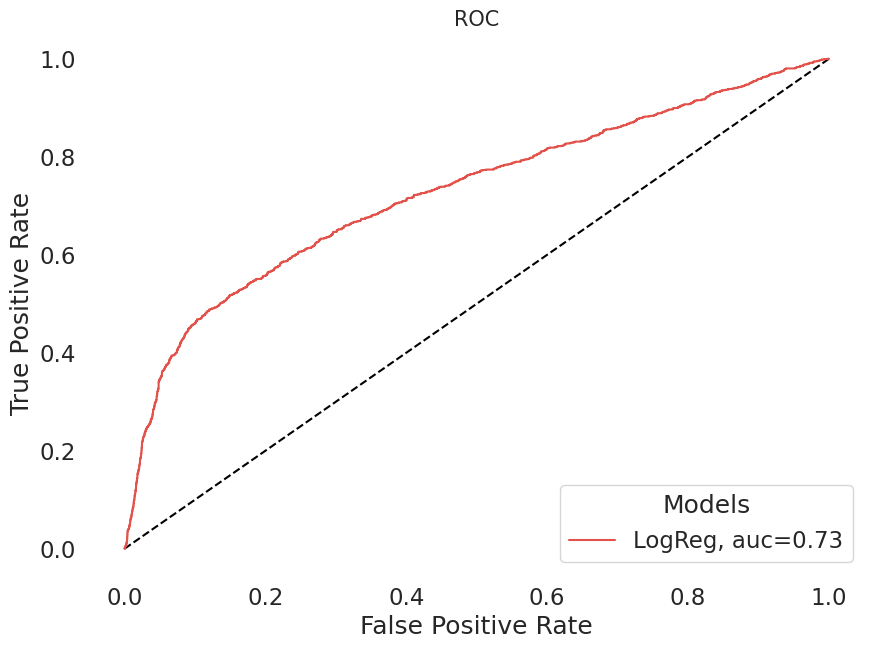

In [55]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3,tpr3,label="LogReg, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

The AUC is obtained for the Logistic Regression, with a value of 0.73. This means there is 73% chance that the model will be able to distinguish between default class and non-default class.